<a href="https://colab.research.google.com/github/Aubin-dev/Creation_reseau_de_neurone/blob/main/Coder_simple_neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#import des packages necessaires 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
assert hasattr(tf,"function")

Load the dataset: Fashion MNIST

In [40]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


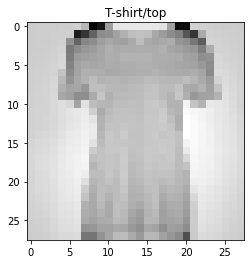

In [41]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
plt.title(targets_names[targets[10]])
plt.show()

In [42]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

In [30]:
print("First line of one image", images[11][0])
print("Associated target", targets[11])

First line of one image [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
  27   0   0   0   0   0   1   0   0   0]
Associated target 9


**Create the model**

**Add the layers**

In [44]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 114ms/step
[[0.01056911 0.11534022 0.00706228 0.03422125 0.01517267 0.01282122
  0.01764922 0.75045365 0.02230088 0.01440949]] [9]


In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [49]:
# Entraîner le model
history = model.fit(images_train, targets_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9984 - val_loss: 0.5490 - val_accuracy: 0.8444
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9991 - val_loss: 0.5454 - val_accuracy: 0.8475
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0255 - accuracy: 0.9994 - val_loss: 0.5496 - val_accuracy: 0.8450
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0244 - accuracy: 0.9992 - val_loss: 0.5507 - val_accuracy: 0.8469
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0231 - accuracy: 0.9992 - val_loss: 0.5534 - val_accuracy: 0.8500
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0223 - accuracy: 0.9994 - val_loss: 0.5555 - val_accuracy: 0.8469
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.9995 - val_loss: 0.5653 - val_accuracy: 0.8469
Epoch 

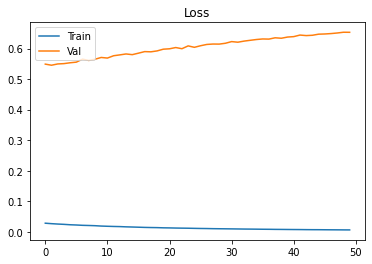

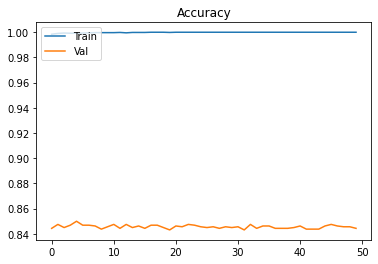

In [50]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve=history.history["val_loss"]
acc_val_curve=history.history["val_accuracy"]

plt.plot(loss_curve,label="Train")
plt.plot(loss_val_curve,label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve,label="Train")
plt.plot(acc_val_curve,label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [51]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test loss", loss)
print("Train accuracy", acc)

63/63 [==============================] - 1s 5ms/step - loss: 0.6483 - accuracy: 0.8555
Test loss 0.6482885479927063
Train accuracy 0.8554999828338623
